In [1]:
#we are going to use a cancer dataset to classify whether the cancer is  Benign or malignant

# Load the breast cancer dataset from sklearn.datasets
# Separate input features and target variables.
# Build and train the SVM classifiers using RBF kernel.
# Plot the scatter plot of the input features.

%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
#import the train_test_split function
from sklearn.model_selection import train_test_split
    

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:,  :2]
y = breast_cancer.target

X.shape, y.shape

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model_svm = SVC(kernel='rbf', gamma=0.5, C=1.0) #build the model
model_svm.fit(X_train, y_train)                             #fit data to the model

SVC(gamma=0.5)

In [5]:
#plot a decision boundary
DecisionBoundaryDisplay.from_estimator(
        model_svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=breast_cancer.feature_names[0],
        ylabel=breast_cancer.feature_names[1],
    )

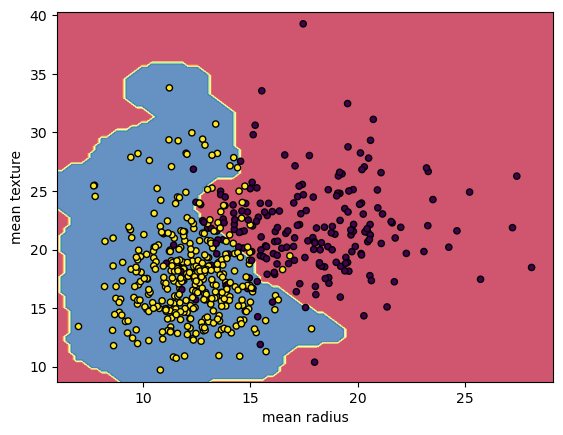

In [6]:
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

In [ ]:
breast_cancer.feature_names, breast_cancer.target_names,


(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'),
 {'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
          1.189e-01],
         [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
          8.902e-02],
         [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
          8.758e-02],

In [8]:
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8947368421052632

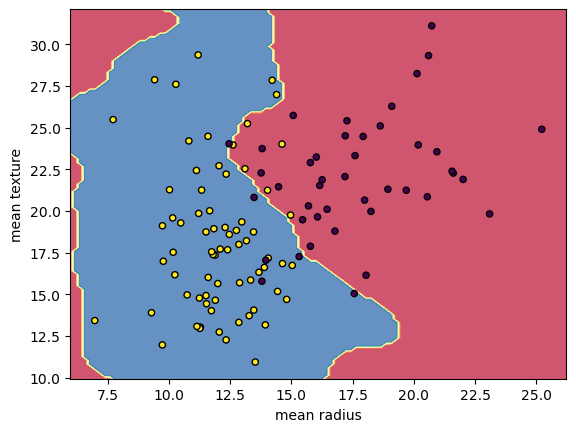

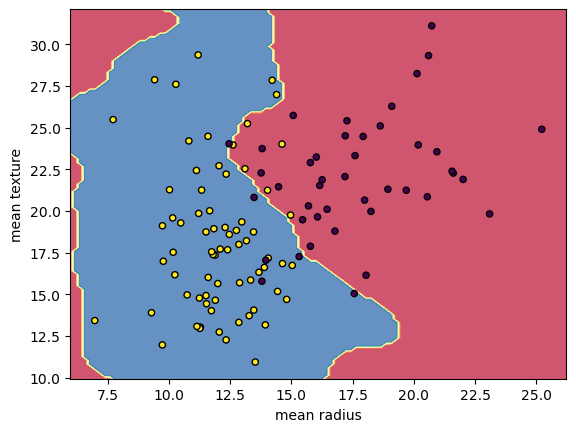

In [10]:
# plot the decision boundary
DecisionBoundaryDisplay.from_estimator(
    model_svm,
    X_test,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=breast_cancer.feature_names[0],
    ylabel=breast_cancer.feature_names[1],
)

# scatter the plot to test the data
plt.scatter(X_test[:, 0], X_test[:, 1], 
            c=y_test, 
            s=20, edgecolors="k")
plt.show()

In [13]:
#lets use the iris datset to classify the species of the flower
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

y.shape, X.shape, iris.feature_names, iris.target_names

((150,),
 (150, 2),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [18]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_svm = SVC(kernel='rbf', gamma=0.5, C=1.0) #build the model
model_svm.fit(X_train, y_train)                             #fit data to the model

X_test.shape, y_test.shape

((30, 2), (30,))

C:\Users\Hp\AppData\Local\Temp\ipykernel_15416\2510833861.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


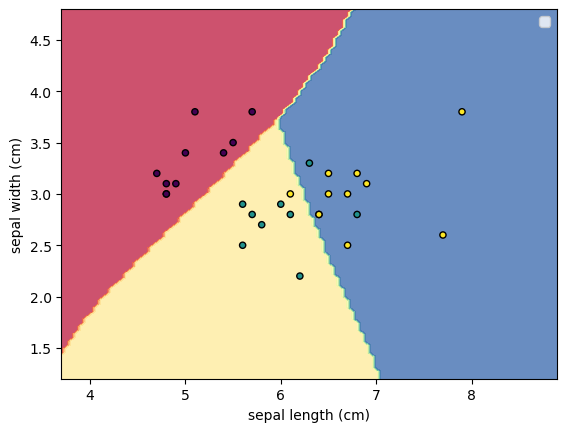

In [ ]:
# using the decision boundary
DecisionBoundaryDisplay.from_estimator(
    model_svm,
    X_test,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    
)

plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_test, 
    s=20, edgecolors="k"
)
# plt.legend()
# plt.show()

In [27]:
# lets scale the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled.shape, X_train_scaled.shape

((30, 2), (120, 2))

In [28]:
#Train the SVM
model_svm = SVC(kernel='rbf', gamma=0.5, C=1.0) #build the model
model_svm.fit(X_train_scaled, y_train)                             #fit data to the model


SVC(gamma=0.5)

In [ ]:
#evaluate the model
from sklearn.metrics import classification_report
y_pred = model_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
# report = pd.DataFrame(report).transpose()
#using DataFrame to display the report
# report = pd.DataFrame(report)

display('report : ', report)

ValueError: DataFrame constructor not properly called!

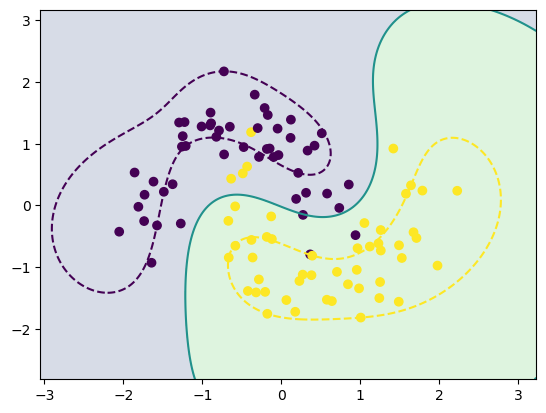

In [34]:
# import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.2, random_state=42)
X = scaler.fit_transform(X)

clf = SVC(kernel='rbf', C=1, gamma=0.5)
clf.fit(X, y)

# Plot decision boundary
# import numpy as np

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0, alpha=0.2)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
